In [5]:
##importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [6]:
## reading a bank consumer complaint data 
df= pd.read_csv(r"C:\Users\DELL\Downloads\consumer_complaints.csv.zip")
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18844\105169735.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r"C:\Users\DELL\Downloads\consumer_complaints.csv.zip")


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [7]:
cp= df["product"].value_counts()
cp

product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: count, dtype: int64

In [8]:
cr= df['company_response_to_consumer'].value_counts()
cr

company_response_to_consumer
Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: count, dtype: int64

In [9]:
disputed = df['consumer_disputed?'].value_counts()
tdispute = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:10]
tnodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:10]

In [10]:
## total number of disputes
disputed

consumer_disputed?
No     443823
Yes    112134
Name: count, dtype: int64

In [11]:
## total disputes exist
tdispute

company
Bank of America                           12480
Wells Fargo & Company                      9644
JPMorgan Chase & Co.                       7716
Equifax                                    6647
Citibank                                   5245
Ocwen                                      5067
Experian                                   3891
TransUnion Intermediate Holdings, Inc.     3824
Nationstar Mortgage                        3157
Capital One                                2935
Name: count, dtype: int64

In [12]:
## total number of disputes solved
tnodispute

company
Bank of America                           43518
Wells Fargo & Company                     32380
Experian                                  27014
JPMorgan Chase & Co.                      26165
Equifax                                   25181
TransUnion Intermediate Holdings, Inc.    21710
Citibank                                  20295
Ocwen                                     15911
Capital One                               12693
Nationstar Mortgage                       10093
Name: count, dtype: int64

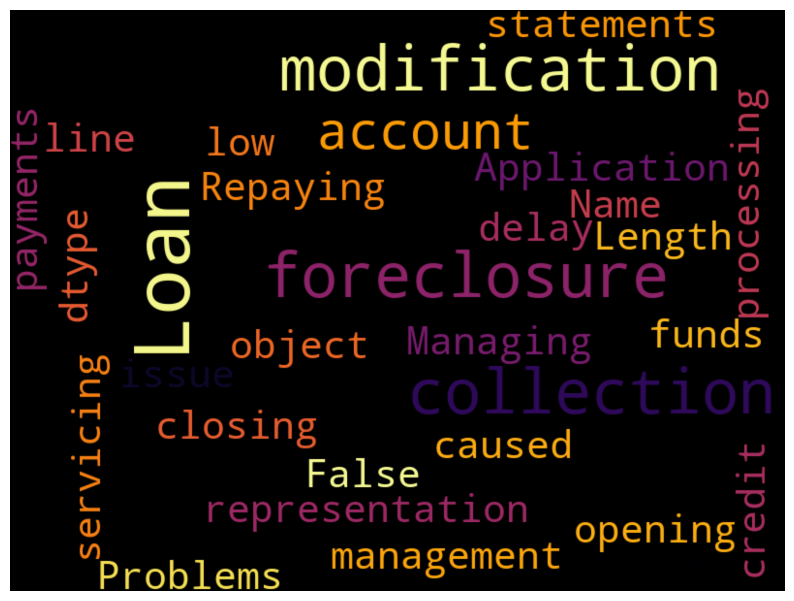

In [13]:
## creating a wordcloud 
disputes_issue = df['issue'].loc[df['consumer_disputed?'] == 'Yes']
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'inferno', 
                       margin = 0,
                       max_words = 2000,  
                       max_font_size = 80,  
                       background_color = "black").generate(str(disputes_issue))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
df['issue'] = df['issue'].str.strip().str.lower()

In [15]:
##encode labels
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column.
df['consumer_disputed']= label_encoder.fit_transform(df['consumer_disputed?'])
 
df['consumer_disputed'].unique()
# YES = 1
# No = 0

array([1, 0])

In [16]:
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,consumer_disputed
0,08/30/2013,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,1
1,08/30/2013,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,1
2,08/30/2013,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,0
3,08/30/2013,Student loan,Non-federal student loan,repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,1
4,08/30/2013,Debt collection,Credit card,false statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529,0
555953,07/01/2014,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447,0
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550,0
555955,04/14/2015,Debt collection,I do not know,communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963,0


In [17]:
## Dividing dataset into test and train set
x = df['issue']
y = df['consumer_disputed']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [18]:
## Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [19]:
## Navie Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [20]:
model.score(x_test, y_test)

0.7866393265702568

In [21]:
model.predict(vec.transform(['Communication tactics']))

array([0])

In [22]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [23]:
dct.score(x_test,y_test)

0.7983020361177063

In [24]:
dct.predict(vec.transform(['Managing the loan or lease']))

array([0])

In [ ]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(x,y)
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

In [ ]:
## checking Accuracy of ML Algorithms like navie bayes,decision tree,knn
a = model.score(x_test, y_test)
b = dct.score(x_test,y_test)
c = accuracy
print("Navie Bayes Accuracy = ",a)
print("Decision Tree Accuracy = ",b)
print("KNN Accuracy = ",c)

In [ ]:
data = {"Navie Bayes":a, "Decision Tree":b,"KNN":c}
ML = list(data.keys())
Accuracy = list(data.values())
fig = plt.figure(figsize = (10,5))
plt.bar(ML, Accuracy, color = "blue", width = 0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different ML algorithms")
plt.show()

In [ ]:
df['label'] = df['label'].apply(lambda x: 'Negative' if 'Mortgage' in x or 'Credit' in x else 'Positive')

In [ ]:
# Visualizing the label distribution
sns.countplot(data=df, x='label')
plt.title("Sentiment Distribution")
plt.show()

# Text preprocessing and vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [ ]:
# Plot Confusion Matrix for Naive Bayes
conf_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()